In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Task 3/Assignment11_to_16/Social_Network_Ads.csv")
print('data.shape')
data.head()

data.shape


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['Gender_enc']=le.fit_transform(data['Gender'])

In [6]:
x=data[['Gender_enc','Age','EstimatedSalary']]
y=data['Purchased']

**Splitting the dataset into the Training set and Test set**

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
                   ('std_scalar',StandardScaler())
])
xtrain=pipeline.fit_transform(xtrain)
xtest=pipeline.fit_transform(xtest)

**Fitting Decision Tree Classification to the Training set**

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=0)

**Predicting the Test set results**

In [21]:
y_test_pred = model.predict(xtest)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [23]:
y_pred = model.predict(xtest)
confusion_matrix(ytest,y_pred)
pd.crosstab(ytest, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,71,8,79
1,8,33,41
All,79,41,120


**Visualising the Training set results**

In [25]:
training_score = model.score(xtrain,ytrain)*100
print("Train data score is :",training_score)

Train data score is : 100.0


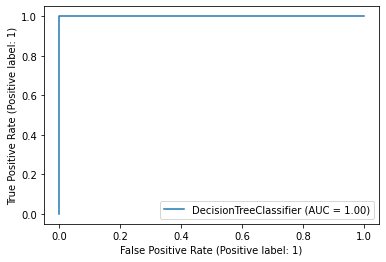

In [27]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,xtrain,ytrain)

**Visualising the Test set results**

In [30]:
from sklearn.metrics import accuracy_score
test_score=accuracy_score(ytest,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 86.66666666666667


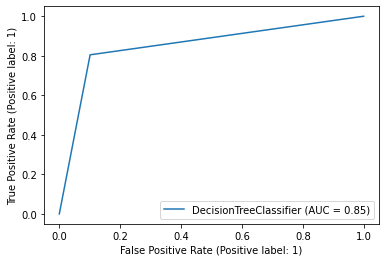

In [33]:
RocCurveDisplay.from_estimator(model,xtest,ytest)